In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=5e2215072af0914ad8baa677599e1ab52bd139ae0f3186ff7eb37a09565cfb3a
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import string
import re
import wget

# Download helper file
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py", out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, non_ascii, lower, email_address, removeStopWords, punct, remove_, remove_special_characters, remove_digits

from tqdm.notebook import tqdm
# Enable progress_apply
tqdm.pandas()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Reading data sets
df_train = pd.read_csv("/content/emotion-labels-train.csv")
df_test = pd.read_csv("/content/emotion-labels-test.csv")
df_val = pd.read_csv("/content/emotion-labels-val.csv")

# Check shapes
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Validation shape:", df_val.shape)

# Display sample data
print("\nSample training data:")
print(df_train.head())

# Data information
print("\nTraining data info:")
print(df_train.info())

Train shape: (3613, 2)
Test shape: (3142, 2)
Validation shape: (347, 2)

Sample training data:
                                                text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB
None


In [ ]:
# Check for null values
print("\nNull values check:")
print("Train:", df_train.isnull().sum())
print("Test:", df_test.isnull().sum())
print("Validation:", df_val.isnull().sum())

# Check for duplicates
print("\nDuplicate values check:")
print("Train:", df_train.duplicated().sum())
print("Test:", df_test.duplicated().sum())
print("Validation:", df_val.duplicated().sum())


Null values check:
Train: text     0
label    0
dtype: int64
Test: text     0
label    0
dtype: int64
Validation: text     0
label    0
dtype: int64

Duplicate values check:
Train: 0
Test: 0
Validation: 0


In [ ]:
# Text preprocessing function
def text_preprocess(data,col):
    data[col] = data[col].progress_apply(func=clean_html) # Eliminates HTML tags and other HTML syntax
    data[col] = data[col].progress_apply(func=punct) # Removes punctuation characters
    data[col] = data[col].progress_apply(func=remove_) # Removes underspace characters
    data[col] = data[col].progress_apply(func=remove_digits) # Removes digits
    data[col] = data[col].progress_apply(func=remove_links) # Eliminates links and URLs
    data[col] = data[col].progress_apply(func=remove_special_characters) # Removes special characters
    data[col] = data[col].progress_apply(func=removeStopWords) # Removes stopwords
    data[col] = data[col].progress_apply(func=lower) # Converts text to lowercase
    data[col] = data[col].progress_apply(func=non_ascii) # Removes non-ASCII characters
    data[col] = data[col].progress_apply(func=email_address) # Removes email addresses
    return data


In [ ]:
# Preprocess data
print("\nPreprocessing training data...")
preprocessed_df_train = text_preprocess(df_train, 'text')
preprocessed_df_train_X = preprocessed_df_train['text']
preprocessed_df_train_Y = preprocessed_df_train['label']

print("\nPreprocessing test data...")
preprocessed_df_test = text_preprocess(df_test, 'text')
preprocessed_df_test_X = preprocessed_df_test['text']
preprocessed_df_test_Y = preprocessed_df_test['label']

print("\nPreprocessing validation data...")
preprocessed_df_val = text_preprocess(df_val, 'text')
preprocessed_df_val_X = preprocessed_df_val['text']
preprocessed_df_val_Y = preprocessed_df_val['label']


Preprocessing training data...


  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]

  0%|          | 0/3613 [00:00<?, ?it/s]


Preprocessing test data...


  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]

  0%|          | 0/3142 [00:00<?, ?it/s]


Preprocessing validation data...


  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]

  0%|          | 0/347 [00:00<?, ?it/s]


Vectorizing with TF-IDF...

Class distribution in training set:
label
fear       1147
anger       857
joy         823
sadness     786
Name: count, dtype: int64


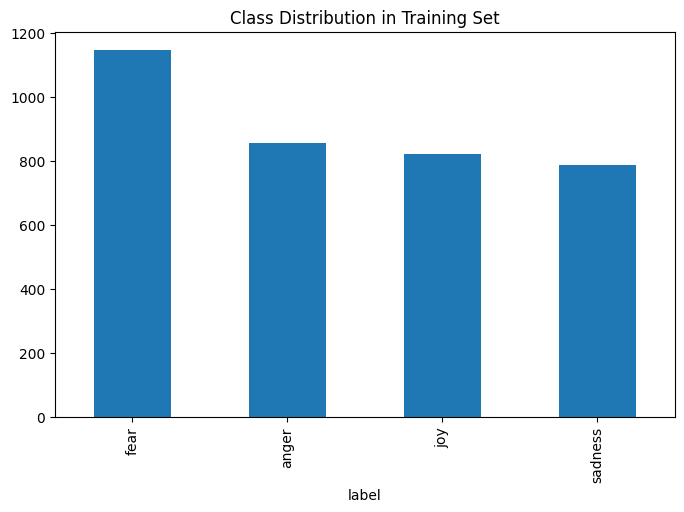

In [ ]:
# Vectorize with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

print("\nVectorizing with TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
preprocessed_df_train_Xtfidf = tfidf.fit_transform(preprocessed_df_train_X)
preprocessed_df_test_Xtfidf = tfidf.transform(preprocessed_df_test_X)
preprocessed_df_val_Xtfidf = tfidf.transform(preprocessed_df_val_X)

# Check class distribution
print("\nClass distribution in training set:")
print(preprocessed_df_train_Y.value_counts())

plt.figure(figsize=(8,5))
preprocessed_df_train_Y.value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Set')
plt.show()


Training and evaluating Naive Bayes...

Naive Bayes Classification Report:
              precision    recall  f1-score   support

       anger       0.82      0.68      0.75       760
        fear       0.64      0.86      0.74       995
         joy       0.85      0.73      0.78       714
     sadness       0.77      0.64      0.70       673

    accuracy                           0.74      3142
   macro avg       0.77      0.73      0.74      3142
weighted avg       0.76      0.74      0.74      3142



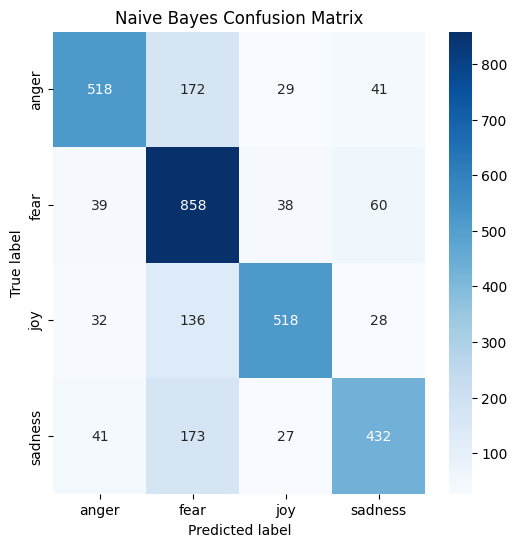

Cross-validation scores: [0.77040111 0.82157676 0.8077455  0.76038781 0.68836565]
Mean CV accuracy: 0.77 (+/- 0.09)

Training and evaluating Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.76      0.80       760
        fear       0.76      0.87      0.81       995
         joy       0.87      0.83      0.85       714
     sadness       0.81      0.76      0.78       673

    accuracy                           0.81      3142
   macro avg       0.82      0.81      0.81      3142
weighted avg       0.82      0.81      0.81      3142



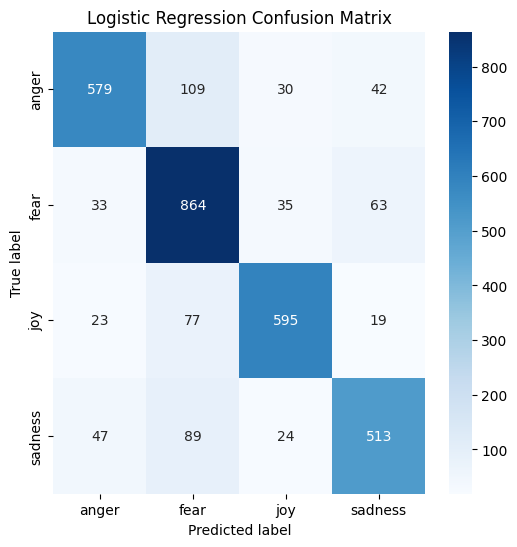

Cross-validation scores: [0.81051176 0.85753804 0.83679115 0.80470914 0.75900277]
Mean CV accuracy: 0.81 (+/- 0.07)

Training and evaluating Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.74      0.80       760
        fear       0.84      0.75      0.79       995
         joy       0.90      0.84      0.87       714
     sadness       0.58      0.82      0.68       673

    accuracy                           0.78      3142
   macro avg       0.80      0.79      0.79      3142
weighted avg       0.81      0.78      0.79      3142



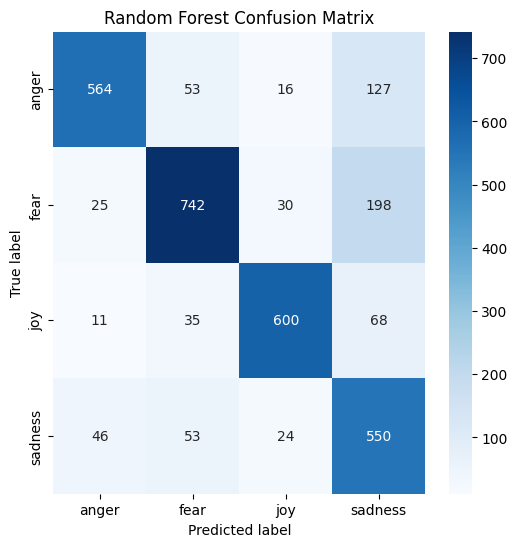

Cross-validation scores: [0.85338866 0.82987552 0.78008299 0.76038781 0.68282548]
Mean CV accuracy: 0.78 (+/- 0.12)


In [ ]:
# Build and evaluate models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score, GridSearchCV

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")

    # Train model
    model.fit(preprocessed_df_train_Xtfidf, preprocessed_df_train_Y)

    # Predictions
    y_pred = model.predict(preprocessed_df_test_Xtfidf)
    y_proba = model.predict_proba(preprocessed_df_test_Xtfidf)

    # Classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(preprocessed_df_test_Y, y_pred))

    # Confusion matrix
    cm = confusion_matrix(preprocessed_df_test_Y, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Cross-validation
    cv_scores = cross_val_score(model, preprocessed_df_train_Xtfidf, preprocessed_df_train_Y, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std()*2:.2f})")

    # Store results
    results[name] = {
        'model': model,
        'accuracy': model.score(preprocessed_df_test_Xtfidf, preprocessed_df_test_Y),
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'classification_report': classification_report(preprocessed_df_test_Y, y_pred, output_dict=True)
    }


In [ ]:
# Results summary
print("\nFinal Model Comparison:")
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'CV Mean Accuracy': [results[name]['cv_mean'] for name in results],
    'CV Std': [results[name]['cv_std'] for name in results],
    'Precision': [precision_score(preprocessed_df_test_Y, results[name]['model'].predict(preprocessed_df_test_Xtfidf), average='weighted') for name in results],
    'Recall': [recall_score(preprocessed_df_test_Y, results[name]['model'].predict(preprocessed_df_test_Xtfidf), average='weighted') for name in results],
    'F1 Score': [f1_score(preprocessed_df_test_Y, results[name]['model'].predict(preprocessed_df_test_Xtfidf), average='weighted') for name in results]
})

results_df


Final Model Comparison:


,Model,Accuracy,CV Mean Accuracy,CV Std,Precision,Recall,F1 Score
0,Naive Bayes,0.740293,0.769695,0.046564,0.759084,0.740293,0.740625
1,Logistic Regression,0.811903,0.813711,0.033280,0.815747,0.811903,0.811866
2,Random Forest,0.781668,0.781312,0.059485,0.805720,0.781668,0.787130


<ipython-input-42-cad11303d3c1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(results_df, x='Precision', y='Model', inner='stick', palette='Dark2')


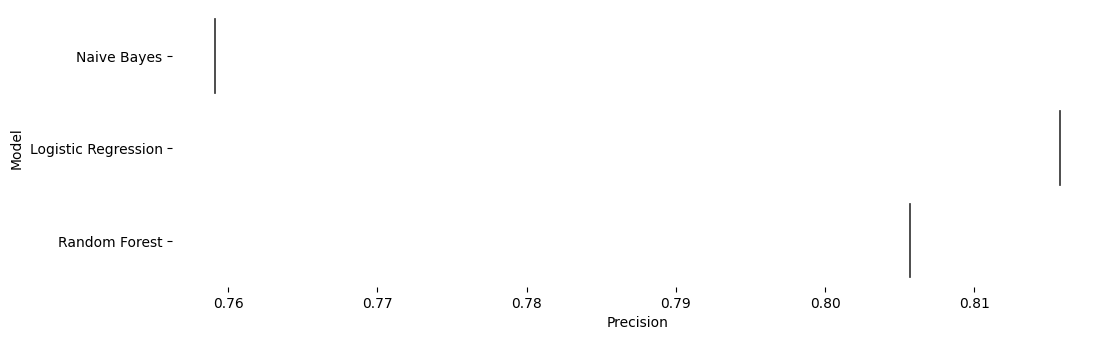

In [ ]:
# Model vs Precision

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-37-8860089cdc0e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(results_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')


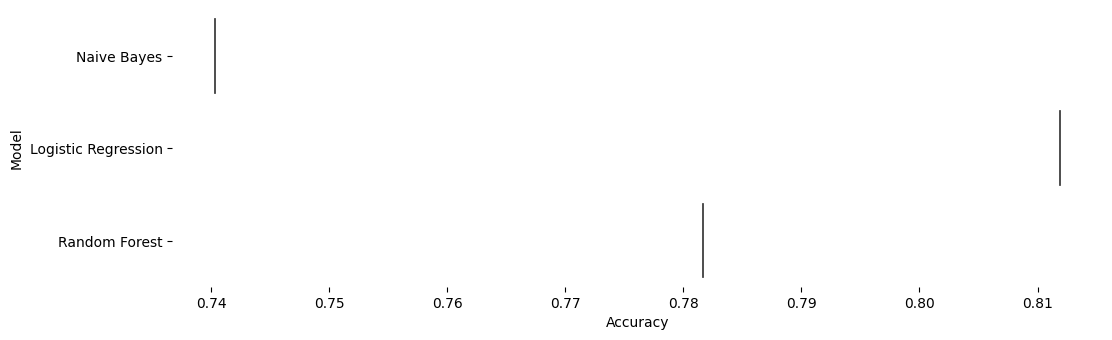

In [ ]:
# Model vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

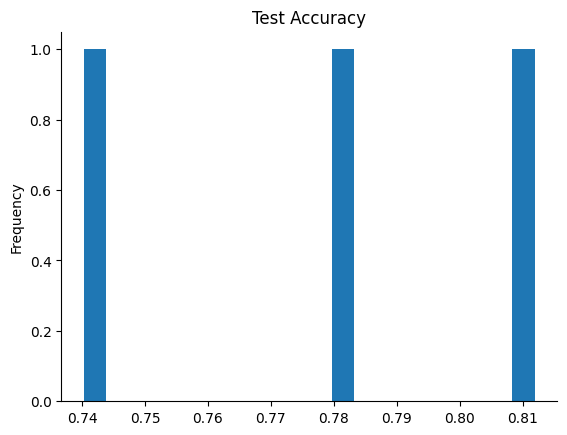

In [ ]:
# @title Test Accuracy

from matplotlib import pyplot as plt
results_df['Test Accuracy'].plot(kind='hist', bins=20, title='Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
results_df

,Model,Test Accuracy,CV Mean Accuracy,CV Std,Precision,Recall,F1 Score
0,Naive Bayes,0.740293,0.769695,0.046564,0.759084,0.740293,0.740625
1,Logistic Regression,0.811903,0.813711,0.033280,0.815747,0.811903,0.811866
2,Random Forest,0.781668,0.781312,0.059485,0.805720,0.781668,0.787130


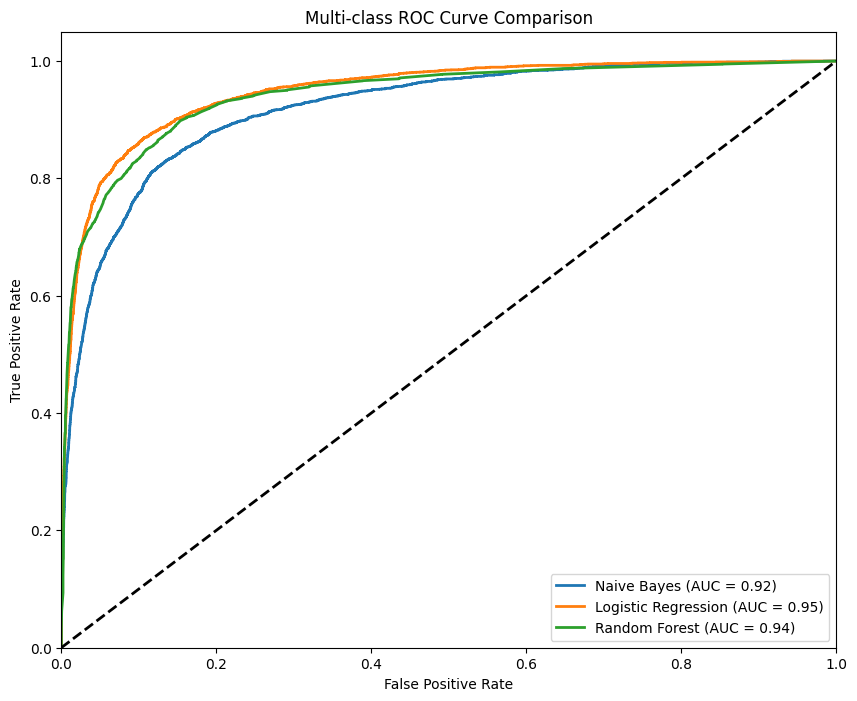

In [ ]:
# ROC-AUC curves
plt.figure(figsize=(10, 8))

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(preprocessed_df_test_Y, classes=models['Naive Bayes'].classes_)
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    y_score = model.predict_proba(preprocessed_df_test_Xtfidf)

    # Compute micro-average ROC curve and area
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc), linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Hyperparameter tuning for best model (Random Forest in this case)
print("\nPerforming hyperparameter tuning for Random Forest...")

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(preprocessed_df_train_Xtfidf, preprocessed_df_train_Y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train best model
best_rf = grid_search.best_estimator_
best_rf.fit(preprocessed_df_train_Xtfidf, preprocessed_df_train_Y)

# Evaluate best model
y_pred_best = best_rf.predict(preprocessed_df_test_Xtfidf)
print("\nBest Random Forest Classification Report:")
print(classification_report(preprocessed_df_test_Y, y_pred_best))


Performing hyperparameter tuning for Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.805951655728095

Best Random Forest Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.76      0.81       760
        fear       0.79      0.82      0.80       995
         joy       0.90      0.85      0.87       714
     sadness       0.69      0.79      0.74       673

    accuracy                           0.80      3142
   macro avg       0.81      0.80      0.81      3142
weighted avg       0.81      0.80      0.81      3142




Top important features from Random Forest:


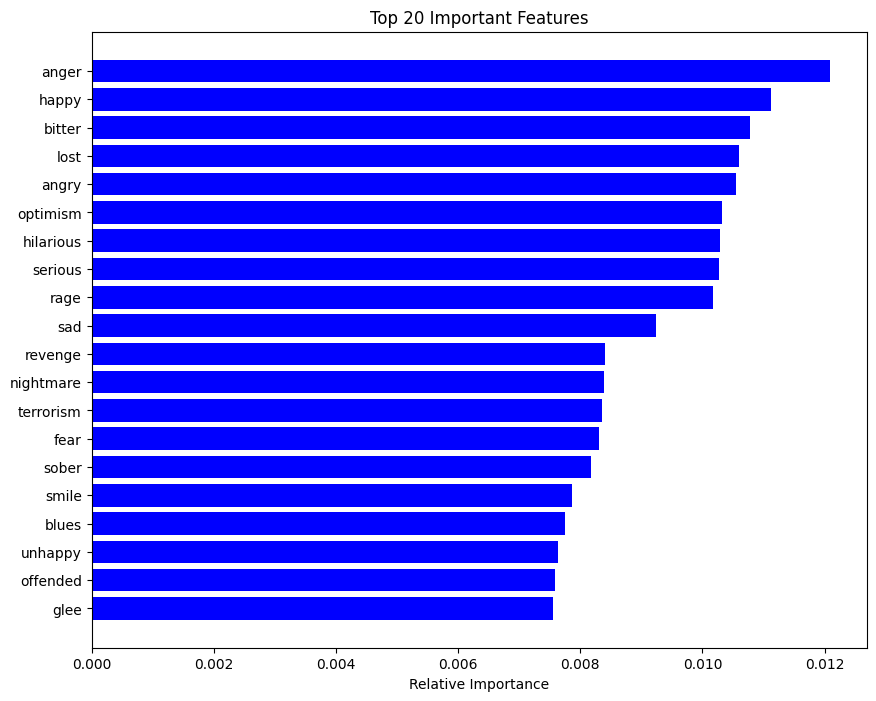

In [ ]:
# Feature importance for Random Forest
print("\nTop important features from Random Forest:")
feature_names = tfidf.get_feature_names_out()
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 features

plt.figure(figsize=(10, 8))
plt.title('Top 20 Important Features')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Error analysis
print("\nError Analysis - Sample misclassified examples:")
y_pred_rf = best_rf.predict(preprocessed_df_test_Xtfidf)
wrong_idx = np.where(y_pred_rf != preprocessed_df_test_Y)[0]

for i in wrong_idx[:5]:
    print(f"Text: {preprocessed_df_test_X.iloc[i]}")
    print(f"True: {preprocessed_df_test_Y.iloc[i]}, Predicted: {y_pred_rf[i]}\n")



Error Analysis - Sample misclassified examples:
Text: the race advances extra achievements individual you individual charles towne n inspire
True: joy, Predicted: fear

Text: twd comes soo
True: joy, Predicted: sadness

Text: sometimes talk sadness other times want distracted friends laughter shopping eating n n mhchat
True: joy, Predicted: sadness

Text: sometimes im sad remember margaret thatcher dead rejoice
True: joy, Predicted: sadness

Text: brown nosing listened lots housing ministers gavinbarwellmp nhf impressed
True: joy, Predicted: sadness



In [ ]:
### Fine-tuned BERT transformer

In [4]:
!pip install -q transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.4 MB/s eta 0:00:00


In [5]:
from datasets import Dataset, DatasetDict
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
import evaluate
import torch
from sklearn.preprocessing import LabelEncoder

In [6]:
# Verify column names
print("Column names in train data:", df_train.columns.tolist())

Column names in train data: ['text', 'label']


In [7]:
# Encode labels numerically (handles both string and numeric labels)
label_encoder = LabelEncoder()
df_train['label'] = label_encoder.fit_transform(df_train['label'])
df_test['label'] = label_encoder.transform(df_test['label'])
df_val['label'] = label_encoder.transform(df_val['label'])

df_train['label']

,label
0,2
1,2
2,2
3,2
4,2
...,...
3608,3
3609,3
3610,3
3611,3


In [8]:
# Convert to Hugging Face Dataset format
dataset_dict = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "test": Dataset.from_pandas(df_test),
    "validation": Dataset.from_pandas(df_val)
})

print("\nDataset loaded:")
print(f"Train samples: {len(dataset_dict['train'])}")
print(f"Test samples: {len(dataset_dict['test'])}")
print(f"Validation samples: {len(dataset_dict['validation'])}")


Dataset loaded:
Train samples: 3613
Test samples: 3142
Validation samples: 347


In [9]:
# Initialize tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Create label mappings
num_labels = len(label_encoder.classes_)
id2label = {i: label for i, label in enumerate(label_encoder.classes_)}
label2id = {label: i for i, label in enumerate(label_encoder.classes_)}

print("\nLabel mappings:")
print(id2label)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


Label mappings:
{0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'}


In [10]:
# Tokenization function with proper settings
def tokenize_function(examples):
    tokenized = tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"  # Return PyTorch tensors directly
    )
    return tokenized

# Tokenize all datasets
tokenized_datasets = dataset_dict.map(
    tokenize_function,
    batched=True,
    remove_columns=["text"]  # Remove text column after tokenization
)

Map:   0%|          | 0/3613 [00:00<?, ? examples/s]

Map:   0%|          | 0/3142 [00:00<?, ? examples/s]

Map:   0%|          | 0/347 [00:00<?, ? examples/s]

In [11]:
# Ensure labels are in correct format (convert to list if needed)
if isinstance(tokenized_datasets["train"]["label"], (int, float)):
    # If labels are already numeric, just rename the column
    tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
else:
    # If labels need conversion
    def convert_labels(examples):
        return {"labels": [int(label) for label in examples["label"]]}
    tokenized_datasets = tokenized_datasets.map(convert_labels, batched=True)
    tokenized_datasets = tokenized_datasets.remove_columns(["label"])

# Verify data format
print("\nSample processed data:")
print(tokenized_datasets["train"][0])

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/3613 [00:00<?, ? examples/s]

Map:   0%|          | 0/3142 [00:00<?, ? examples/s]

Map:   0%|          | 0/347 [00:00<?, ? examples/s]


Sample processed data:
{'input_ids': [101, 2074, 2288, 2067, 2013, 3773, 1030, 5639, 9247, 7231, 2100, 1999, 20934, 2869, 16930, 1012, 6429, 999, 999, 2227, 2145, 13403, 2013, 5870, 2061, 2172, 1001, 26316, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
# Evaluation metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")["f1"]

    return {"accuracy": accuracy, "f1": f1}

In [13]:
# Load model
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
!pip install torchsummary

In [15]:
from transformers import BertForSequenceClassification
from torchsummary import summary

# Display Model Architecture
print("\n" + "="*50)
print("MODEL ARCHITECTURE")
print("="*50)
print(model)  # This prints the full architecture

# Display Model Summary (requires torchsummary)
try:
    print("\n" + "="*50)
    print("MODEL SUMMARY")
    print("="*50)
    # Move model to CPU for summary
    model.to('cpu')
    # Create dummy input matching your tokenizer's max length
    dummy_input = torch.ones((1, 128), dtype=torch.long)  # (batch_size, sequence_length)
    # Print summary
    summary(model, input_data=dummy_input, depth=4)
except Exception as e:
    print(f"Could not generate full summary: {e}")
    print("Install torchsummary if needed: !pip install torchsummary")

# Display Layer-wise Information
print("\n" + "="*50)
print("LAYER DETAILS")
print("="*50)
for name, param in model.named_parameters():
    print(f"{name}: {param.shape} (Trainable: {param.requires_grad})")

# Count Parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\n" + "="*50)
print("PARAMETER COUNT")
print("="*50)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Frozen parameters: {total_params - trainable_params:,}")

# Display Configuration
print("\n" + "="*50)
print("MODEL CONFIGURATION")
print("="*50)
print(model.config)


MODEL ARCHITECTURE
BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Laye

In [16]:
# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Training arguments
training_args = TrainingArguments(
    output_dir="emotion_classifier",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=10,
    report_to="none",
    remove_unused_columns=True  # Important to avoid issues
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Start training
print("\nStarting training...")
trainer.train()

# Evaluate on test set
print("\nEvaluating on test set...")
test_results = trainer.evaluate(tokenized_datasets["test"])
print(f"Test accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Test F1 score: {test_results['eval_f1']:.4f}")

Using device: cuda

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.629400,0.564417,0.798271,0.798446
2,0.425800,0.415626,0.850144,0.850200
3,0.238900,0.438317,0.855908,0.856141
4,0.176100,0.451952,0.873199,0.873330



Evaluating on test set...


Test accuracy: 0.8482
Test F1 score: 0.8483


In [17]:
# Save the model
trainer.save_model("custom_emotion_classifier")
print("\nModel saved to 'custom_emotion_classifier' directory")


Model saved to 'custom_emotion_classifier' directory


In [18]:
# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
def predict_emotion(text):
    # Tokenize and move to same device as model
    inputs = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=128
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1).item()
    return id2label[predicted_class]

# Test examples
examples = [
    "I'm feeling really happy right now",
    "This situation makes me so angry",
    "I'm scared about what might happen tomorrow",
    "I feel so lonely these days"
]

print("\nTesting predictions:")
for example in examples:
    emotion = predict_emotion(example)
    print(f"Text: '{example[:50]}...' \t Predicted Emotion: {emotion}")


Using device: cuda

Testing predictions:
Text: 'I'm feeling really happy right now...' 	 Predicted Emotion: joy
Text: 'This situation makes me so angry...' 	 Predicted Emotion: anger
Text: 'I'm scared about what might happen tomorrow...' 	 Predicted Emotion: fear
Text: 'I feel so lonely these days...' 	 Predicted Emotion: sadness


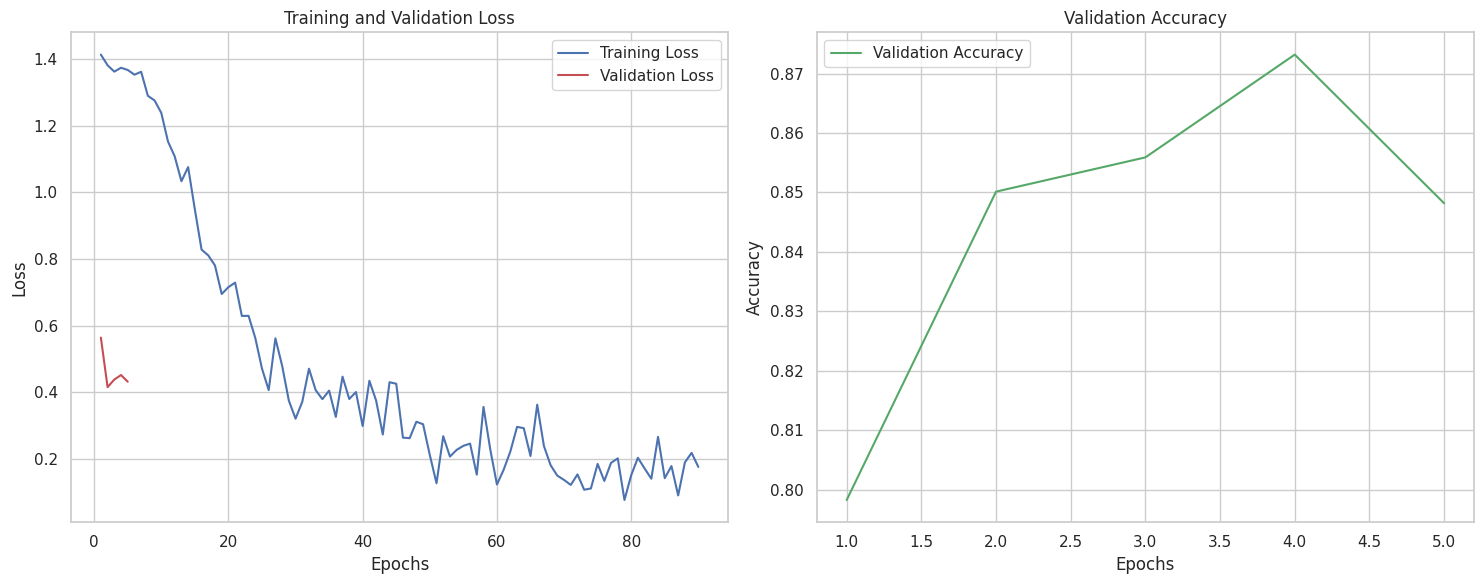

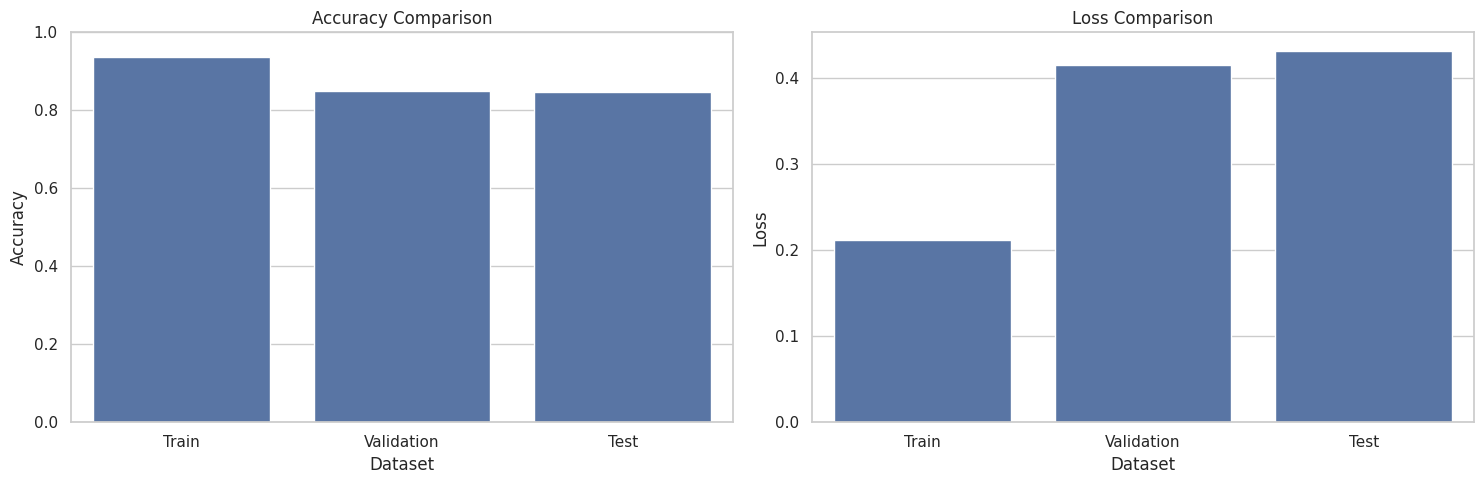

In [19]:
# Set style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# 1. Plot Training History (Loss and Accuracy)
history = trainer.state.log_history

# Convert history to DataFrame for easier processing
history_df = pd.DataFrame(history)

# Separate training and evaluation metrics
train_metrics = history_df[history_df['loss'].notna()].copy()
eval_metrics = history_df[history_df['eval_loss'].notna()].copy()

# Ensure we have matching epochs
train_metrics['epoch'] = range(1, len(train_metrics) + 1)
eval_metrics['epoch'] = range(1, len(eval_metrics) + 1)

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_metrics['epoch'], train_metrics['loss'], 'b-', label='Training Loss')
plt.plot(eval_metrics['epoch'], eval_metrics['eval_loss'], 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy if available
if 'eval_accuracy' in eval_metrics:
    plt.subplot(1, 2, 2)
    plt.plot(eval_metrics['epoch'], eval_metrics['eval_accuracy'], 'g-', label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

# 2. Plot Final Performance Comparison (Train/Val/Test)
# Get metrics for each dataset
def get_metrics(dataset_name):
    prefix = dataset_name.lower()
    metrics = trainer.evaluate(
        tokenized_datasets[dataset_name.lower()],
        metric_key_prefix=prefix
    )
    return {
        'Accuracy': metrics.get(f'{prefix}_accuracy', np.nan),
        'Loss': metrics.get(f'{prefix}_loss', np.nan)
    }

metrics = {
    'Train': get_metrics('train'),
    'Validation': get_metrics('validation'),
    'Test': get_metrics('test')
}

# Prepare data for plotting
metrics_df = pd.DataFrame({
    'Dataset': list(metrics.keys()),
    'Accuracy': [m['Accuracy'] for m in metrics.values()],
    'Loss': [m['Loss'] for m in metrics.values()]
})

# Plot final metrics comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Dataset', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(x='Dataset', y='Loss', data=metrics_df)
plt.title('Loss Comparison')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import classification_report
import numpy as np
import torch

def generate_classification_report(dataset_name, dataset, trainer, label_encoder):
    """Generate and print classification report for a dataset"""
    print(f"\n{dataset_name} Set Classification Report")
    print("="*60)

    # Move model to CPU for evaluation (optional, can also move data to GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = trainer.model.to(device)

    # Get predictions
    predictions = trainer.predict(dataset)
    preds = np.argmax(predictions.predictions, axis=1)
    labels = predictions.label_ids

    # Generate report
    report = classification_report(
        labels,
        preds,
        target_names=label_encoder.classes_,
        digits=4
    )
    print(report)

    return report

# Generate reports for all sets
print("Generating classification reports...")

try:
    train_report = generate_classification_report(
        "Train",
        tokenized_datasets["train"],
        trainer,
        label_encoder
    )
except Exception as e:
    print(f"Error generating train report: {e}")

try:
    val_report = generate_classification_report(
        "Validation",
        tokenized_datasets["validation"],
        trainer,
        label_encoder
    )
except Exception as e:
    print(f"Error generating validation report: {e}")

try:
    test_report = generate_classification_report(
        "Test",
        tokenized_datasets["test"],
        trainer,
        label_encoder
    )
except Exception as e:
    print(f"Error generating test report: {e}")

# Optional: Save reports to files
try:
    with open("train_classification_report.txt", "w") as f:
        f.write(str(train_report))
    with open("val_classification_report.txt", "w") as f:
        f.write(str(val_report))
    with open("test_classification_report.txt", "w") as f:
        f.write(str(test_report))
    print("\nReports saved to text files")
except Exception as e:
    print(f"\nCould not save reports: {e}")

Generating classification reports...

Train Set Classification Report


              precision    recall  f1-score   support

       anger     0.9361    0.9405    0.9383       857
        fear     0.9392    0.9163    0.9276      1147
         joy     0.9638    0.9696    0.9667       823
     sadness     0.9031    0.9249    0.9139       786

    accuracy                         0.9361      3613
   macro avg     0.9356    0.9378    0.9366      3613
weighted avg     0.9362    0.9361    0.9361      3613


Validation Set Classification Report


              precision    recall  f1-score   support

       anger     0.8690    0.8690    0.8690        84
        fear     0.8585    0.8273    0.8426       110
         joy     0.8625    0.8734    0.8679        79
     sadness     0.8052    0.8378    0.8212        74

    accuracy                         0.8501       347
   macro avg     0.8488    0.8519    0.8502       347
weighted avg     0.8506    0.8501    0.8502       347


Test Set Classification Report


              precision    recall  f1-score   support

       anger     0.8496    0.8474    0.8485       760
        fear     0.8784    0.8131    0.8445       995
         joy     0.8713    0.9006    0.8857       714
     sadness     0.7848    0.8455    0.8140       673

    accuracy                         0.8482      3142
   macro avg     0.8460    0.8516    0.8482      3142
weighted avg     0.8498    0.8482    0.8483      3142


Reports saved to text files


Training Set Confusion Matrix:


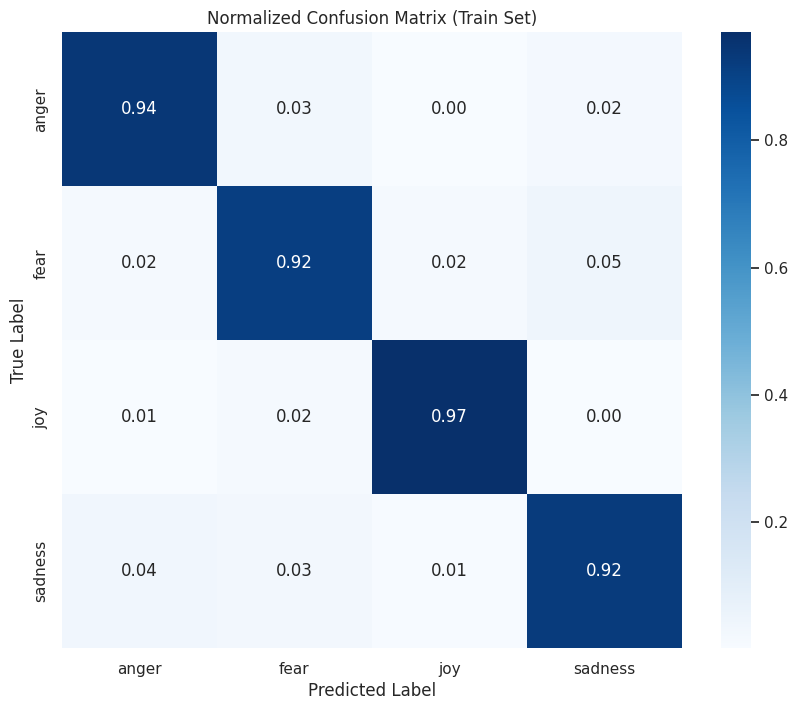


Validation Set Confusion Matrix:


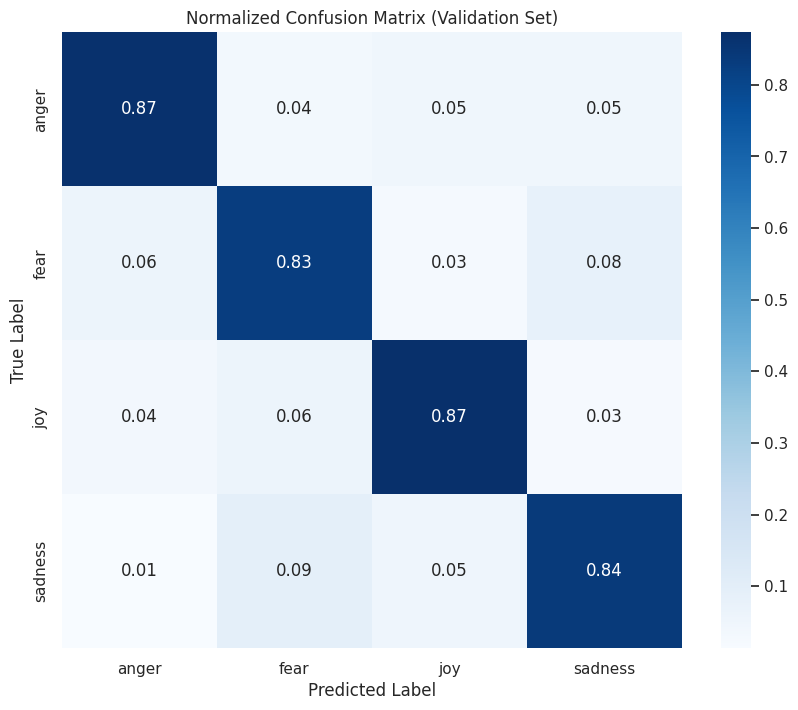


test Set Confusion Matrix:


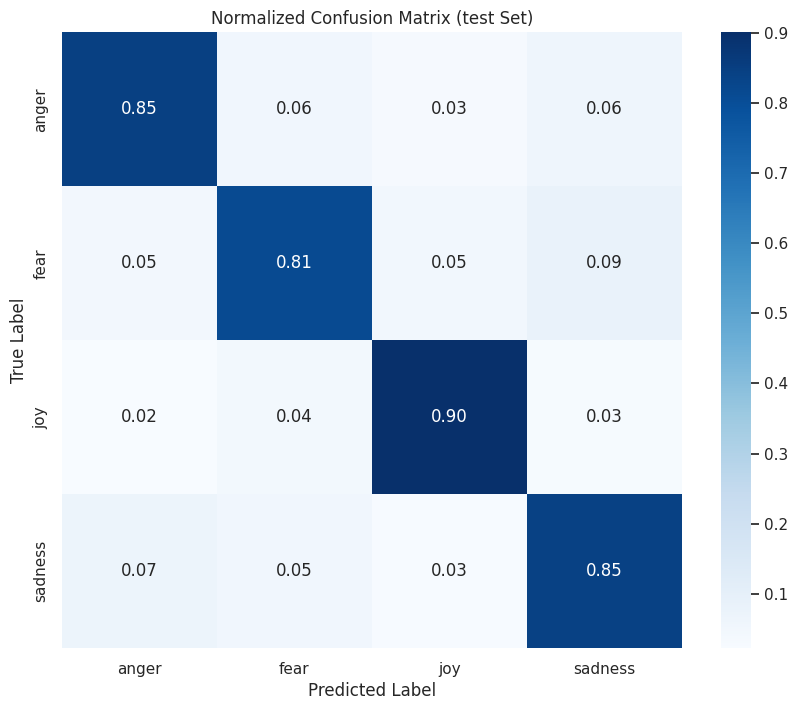

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(dataset_name, tokenized_data, trainer, label_encoder):
    """Generate and plot confusion matrix for a given dataset"""
    # Get predictions
    predictions = trainer.predict(tokenized_data)
    preds = np.argmax(predictions.predictions, axis=1)
    labels = predictions.label_ids

    # Compute confusion matrix
    cm = confusion_matrix(labels, preds, normalize='true')  # Normalized by true labels

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Normalized Confusion Matrix ({dataset_name} Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Generate confusion matrix for training set
print("Training Set Confusion Matrix:")
plot_confusion_matrix("Train", tokenized_datasets["train"], trainer, label_encoder)

# Generate confusion matrix for validation set
print("\nValidation Set Confusion Matrix:")
plot_confusion_matrix("Validation", tokenized_datasets["validation"], trainer, label_encoder)

# Generate confusion matrix for test set
print("\ntest Set Confusion Matrix:")
plot_confusion_matrix("test", tokenized_datasets["test"], trainer, label_encoder)